In [32]:
import sys
from dotenv import load_dotenv
import os

load_dotenv()

sys.path.append(os.getenv("ROOT"))

In [33]:
import polars as pl
import numpy as np
from datetime import date
from silverfund.datasets import CRSPMonthly
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# Load dataset
df = (
    CRSPMonthly(start_date=date(2006, 1, 1), end_date=date(2024, 8, 1))
    .load_all()
    .select(["permno", "ticker", "date", "shrout", "prc", "ret"])
)

df

permno,ticker,date,shrout,prc,ret
i64,str,date,f64,f64,f64
10001,"""EWST""",2006-01-31,2930.0,9.49,-0.016495
10001,"""EWST""",2006-02-28,2931.0,9.39,-0.010537
10001,"""EWST""",2006-03-31,2932.0,10.99,0.170394
10001,"""EWST""",2006-04-28,2932.0,9.95,-0.094632
10001,"""EWST""",2006-05-31,2932.0,9.766,-0.010452
…,…,…,…,…,…
93436,"""TSLA""",2024-03-28,3.188966e6,175.78999,-0.129235
93436,"""TSLA""",2024-04-30,3.189196e6,183.28,0.042608
93436,"""TSLA""",2024-05-31,3.189196e6,178.08,-0.028372


In [35]:
# Reversal signal

df = df.with_columns(pl.col("ret").shift(1).over("permno").alias("rev"))

df

permno,ticker,date,shrout,prc,ret,rev
i64,str,date,f64,f64,f64,f64
10001,"""EWST""",2006-01-31,2930.0,9.49,-0.016495,null
10001,"""EWST""",2006-02-28,2931.0,9.39,-0.010537,-0.016495
10001,"""EWST""",2006-03-31,2932.0,10.99,0.170394,-0.010537
10001,"""EWST""",2006-04-28,2932.0,9.95,-0.094632,0.170394
10001,"""EWST""",2006-05-31,2932.0,9.766,-0.010452,-0.094632
…,…,…,…,…,…,…
93436,"""TSLA""",2024-03-28,3.188966e6,175.78999,-0.129235,0.077901
93436,"""TSLA""",2024-04-30,3.189196e6,183.28,0.042608,-0.129235
93436,"""TSLA""",2024-05-31,3.189196e6,178.08,-0.028372,0.042608


In [36]:
# Filters

# Price greater than 5
df = df.with_columns(pl.col("prc").shift(1).over("permno").alias("prclag"))
df = df.filter(pl.col("prclag") > 5)

# Non-null momentum signal
df = df.drop_nulls(subset=["rev"])

df

permno,ticker,date,shrout,prc,ret,rev,prclag
i64,str,date,f64,f64,f64,f64,f64
10001,"""EWST""",2006-02-28,2931.0,9.39,-0.010537,-0.016495,9.49
10001,"""EWST""",2006-03-31,2932.0,10.99,0.170394,-0.010537,9.39
10001,"""EWST""",2006-04-28,2932.0,9.95,-0.094632,0.170394,10.99
10001,"""EWST""",2006-05-31,2932.0,9.766,-0.010452,-0.094632,9.95
10001,"""EWST""",2006-06-30,2934.0,9.02,-0.076387,-0.010452,9.766
…,…,…,…,…,…,…,…
93436,"""TSLA""",2024-03-28,3.188966e6,175.78999,-0.129235,0.077901,201.88
93436,"""TSLA""",2024-04-30,3.189196e6,183.28,0.042608,-0.129235,175.78999
93436,"""TSLA""",2024-05-31,3.189196e6,178.08,-0.028372,0.042608,183.28


In [37]:
# Create portfolio bins

labels = [str(x) for x in range(10)]

df = df.with_columns(pl.col("rev").qcut(10, labels=labels).over("date").alias("bin"))

df

permno,ticker,date,shrout,prc,ret,rev,prclag,bin
i64,str,date,f64,f64,f64,f64,f64,cat
10001,"""EWST""",2006-02-28,2931.0,9.39,-0.010537,-0.016495,9.49,"""1"""
10001,"""EWST""",2006-03-31,2932.0,10.99,0.170394,-0.010537,9.39,"""4"""
10001,"""EWST""",2006-04-28,2932.0,9.95,-0.094632,0.170394,10.99,"""9"""
10001,"""EWST""",2006-05-31,2932.0,9.766,-0.010452,-0.094632,9.95,"""0"""
10001,"""EWST""",2006-06-30,2934.0,9.02,-0.076387,-0.010452,9.766,"""6"""
…,…,…,…,…,…,…,…,…
93436,"""TSLA""",2024-03-28,3.188966e6,175.78999,-0.129235,0.077901,201.88,"""6"""
93436,"""TSLA""",2024-04-30,3.189196e6,183.28,0.042608,-0.129235,175.78999,"""0"""
93436,"""TSLA""",2024-05-31,3.189196e6,178.08,-0.028372,0.042608,183.28,"""9"""


In [38]:
# Create portfolio returns dataframe

# Aggregate (equal weight portfolios)
port = df.group_by(["date", "bin"]).agg(pl.col("ret").mean())

# Pivot
port = port.pivot(on="bin", index="date", values="ret")

# Reorder columns
port = port.select(["date"] + labels)

# Sort
port = port.sort(by="date")

port

date,0,1,2,3,4,5,6,7,8,9
date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2006-02-28,0.005193,0.012009,0.015558,0.010972,0.008292,0.003299,0.006017,0.005061,-0.018681,-0.032769
2006-03-31,0.048716,0.041011,0.032858,0.037969,0.021803,0.026953,0.026515,0.038886,0.046563,0.052925
2006-04-28,0.001199,0.007093,0.006361,-0.002487,0.000959,0.006873,0.007879,0.004213,0.019433,0.015962
2006-05-31,-0.064116,-0.04784,-0.045789,-0.040726,-0.026252,-0.026923,-0.040414,-0.044959,-0.042052,-0.059265
2006-06-30,-0.010888,-0.009708,-0.014572,-0.005874,0.001815,0.005473,0.000547,-0.003136,0.000736,-0.001526
…,…,…,…,…,…,…,…,…,…,…
2024-03-28,0.015032,0.031919,0.046388,0.038175,0.034332,0.039438,0.042167,0.024415,0.037009,0.013762
2024-04-30,-0.107943,-0.08744,-0.072626,-0.058364,-0.059748,-0.050528,-0.052796,-0.050508,-0.051095,-0.077848
2024-05-31,0.057582,0.024337,0.038337,0.030484,0.033572,0.032789,0.045511,0.043433,0.03576,0.020224


In [39]:
# Create spread portfolio

port = port.with_columns((pl.col("0") - pl.col("9")).alias("spread"))

port

date,0,1,2,3,4,5,6,7,8,9,spread
date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2006-02-28,0.005193,0.012009,0.015558,0.010972,0.008292,0.003299,0.006017,0.005061,-0.018681,-0.032769,0.037963
2006-03-31,0.048716,0.041011,0.032858,0.037969,0.021803,0.026953,0.026515,0.038886,0.046563,0.052925,-0.00421
2006-04-28,0.001199,0.007093,0.006361,-0.002487,0.000959,0.006873,0.007879,0.004213,0.019433,0.015962,-0.014763
2006-05-31,-0.064116,-0.04784,-0.045789,-0.040726,-0.026252,-0.026923,-0.040414,-0.044959,-0.042052,-0.059265,-0.004851
2006-06-30,-0.010888,-0.009708,-0.014572,-0.005874,0.001815,0.005473,0.000547,-0.003136,0.000736,-0.001526,-0.009362
…,…,…,…,…,…,…,…,…,…,…,…
2024-03-28,0.015032,0.031919,0.046388,0.038175,0.034332,0.039438,0.042167,0.024415,0.037009,0.013762,0.001269
2024-04-30,-0.107943,-0.08744,-0.072626,-0.058364,-0.059748,-0.050528,-0.052796,-0.050508,-0.051095,-0.077848,-0.030095
2024-05-31,0.057582,0.024337,0.038337,0.030484,0.033572,0.032789,0.045511,0.043433,0.03576,0.020224,0.037357


In [40]:
# Unpivot dataframe
port = port.unpivot(index="date", variable_name="bin", value_name="ret")

# Sort
port = port.sort(by=["date", "bin"])

port

date,bin,ret
date,str,f64
2006-02-28,"""0""",0.005193
2006-02-28,"""1""",0.012009
2006-02-28,"""2""",0.015558
2006-02-28,"""3""",0.010972
2006-02-28,"""4""",0.008292
…,…,…
2024-07-31,"""6""",0.093015
2024-07-31,"""7""",0.095517
2024-07-31,"""8""",0.080103


In [41]:
# Calculate mean, std, sharpe, and tstat of each portfolio

# Mean, std, and count
result = port.group_by("bin").agg(
    [
        pl.col("ret").mean().cast(pl.Float64).alias("mean"),
        pl.col("ret").std().cast(pl.Float64).alias("std"),
        pl.col("ret").count().cast(pl.Float64).alias("count"),
    ]
)

# Sharpe
result = result.with_columns(
    ((pl.col("mean") * 12) / (pl.col("std") * np.sqrt(12)))
    .cast(pl.Float64)
    .alias("annualized_sharpe")
)

# Tstat
result = result.with_columns(
    (pl.col("mean") / (pl.col("std") / pl.col("count").sqrt())).cast(pl.Float64).alias("tstat")
)

# Sort
result = result.sort(by="bin")

# Transpose
result = result.transpose(include_header=True, column_names="bin", header_name="statistic")

print("Monthly results")
result

Monthly results


statistic,0,1,2,3,4,5,6,7,8,9,spread
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""mean""",0.007022,0.008233,0.009378,0.010228,0.009566,0.009486,0.007831,0.007037,0.005483,0.003385,0.003637
"""std""",0.080596,0.064533,0.058128,0.054407,0.051408,0.050546,0.050222,0.050293,0.051507,0.060329,0.043197
"""count""",222.0,222.0,222.0,222.0,222.0,222.0,222.0,222.0,222.0,222.0,222.0
"""annualized_sharpe""",0.30181,0.441968,0.558869,0.651233,0.644579,0.650087,0.540145,0.48467,0.368769,0.194362,0.291666
"""tstat""",1.298132,1.900976,2.403785,2.801059,2.772438,2.796132,2.323253,2.084646,1.586134,0.835984,1.254501


In [42]:
# Create backtest plot

# Log returns
port = port.with_columns(pl.col("ret").log1p().over("bin").alias("logret"))

# Cummulative sum log returns
port = port.with_columns(pl.col("logret").cum_sum().over("bin").alias("cumret") * 100)

port

date,bin,ret,logret,cumret
date,str,f64,f64,f64
2006-02-28,"""0""",0.005193,0.00518,0.518004
2006-02-28,"""1""",0.012009,0.011938,1.193773
2006-02-28,"""2""",0.015558,0.015438,1.543833
2006-02-28,"""3""",0.010972,0.010913,1.091252
2006-02-28,"""4""",0.008292,0.008258,0.825773
…,…,…,…,…
2024-07-31,"""6""",0.093015,0.08894,145.212205
2024-07-31,"""7""",0.095517,0.091227,127.543722
2024-07-31,"""8""",0.080103,0.077056,91.91718


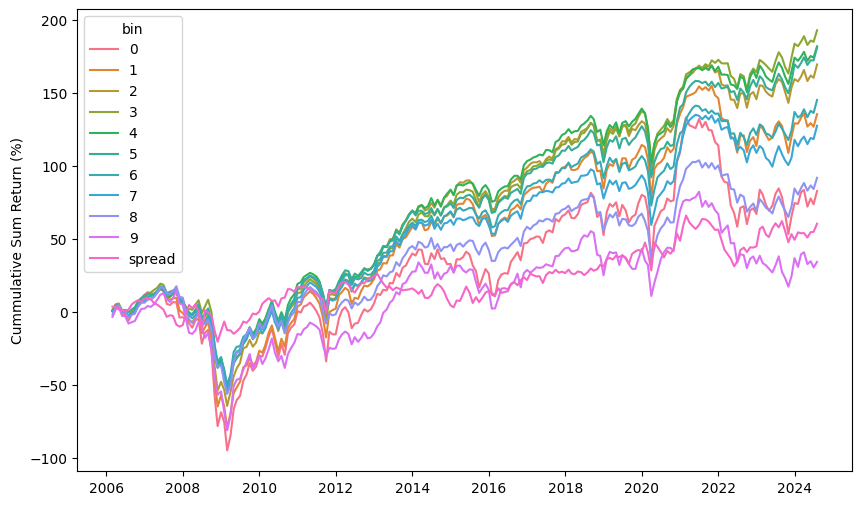

In [43]:
plt.figure(figsize=(10, 6))
sns.lineplot(port, x="date", y="cumret", hue="bin")
plt.xlabel(None)
plt.ylabel("Cummulative Sum Return (%)")
plt.show()

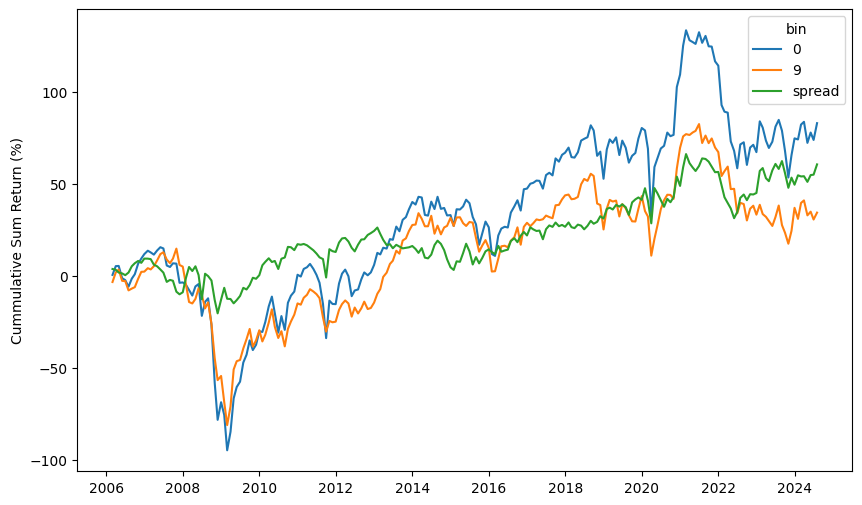

In [44]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    port.filter(pl.col("bin").is_in(["0", "9", "spread"])), x="date", y="cumret", hue="bin"
)
plt.xlabel(None)
plt.ylabel("Cummulative Sum Return (%)")
plt.show()

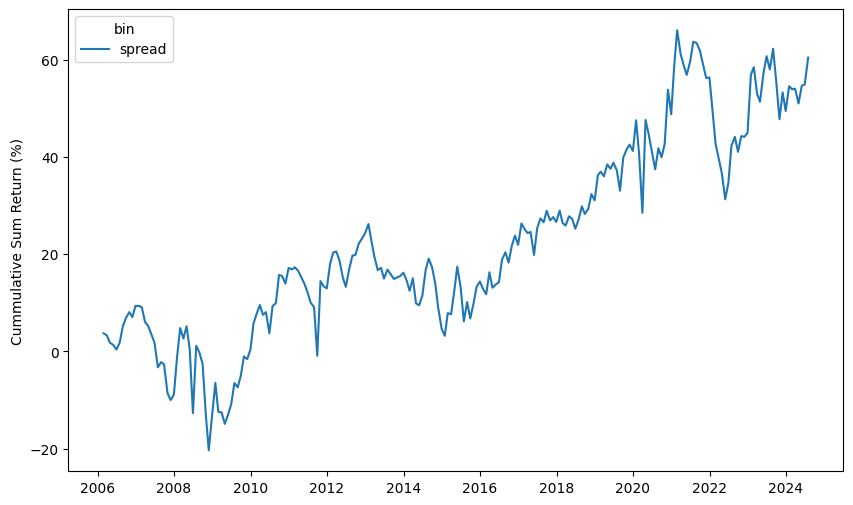

In [45]:
plt.figure(figsize=(10, 6))
sns.lineplot(port.filter(pl.col("bin") == "spread"), x="date", y="cumret", hue="bin")
plt.xlabel(None)
plt.ylabel("Cummulative Sum Return (%)")
plt.show()

In [46]:
min_date = port["date"].min().strftime("%Y-%m-%d")
max_date = port["date"].max().strftime("%Y-%m-%d")

print(f"From {min_date} to {max_date}")

From 2006-02-28 to 2024-07-31
